# Assignment 1: Time Series Forecast With Python (Seasonal ARIMA)

**Lecturer**: Vincent Claes<br>
**Authors:** Bryan Honof, Jeffrey Gorissen<br>
**Start Date:** 19/10/2018
    
**Objective:** Visualize and predict the future temperatures via ARIMA

**Description:** In this notebook we train our model

In [1]:
import math
import warnings
import datetime

import pandas            as pd
import itertools         as it
import statsmodels.api   as sm
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
data_csv = pd.read_csv('./data/rolmean_data.csv')
data = pd.DataFrame()

# Convert the creation_date column to datetime64
data['dateTime'] = pd.to_datetime(data_csv['dateTime'])
# Convert the value column to float
data['temperature'] = pd.to_numeric(data_csv['temperature'])

# Set the dateTime column as index
data = data.set_index(['dateTime'])

# Sort the dataFrame just to be sure...
data = data.sort_index()

data = data.dropna()

# Double check the results
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 2018-11-11 03:00:00 to 2018-11-19 19:45:00
Data columns (total 1 columns):
temperature    836 non-null float64
dtypes: float64(1)
memory usage: 13.1 KB


In [3]:
data.tail(5)

,temperature
dateTime,
2018-11-19 18:45:00,16.52
2018-11-19 19:00:00,16.44
2018-11-19 19:15:00,16.48
2018-11-19 19:30:00,16.50
2018-11-19 19:45:00,16.45


In [ ]:
data

In [4]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 96),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                           Statespace Model Results                           
Dep. Variable:            temperature   No. Observations:                  836
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 853.424
Date:                Mon, 19 Nov 2018   AIC                          -1700.848
Time:                        21:02:14   BIC                          -1686.673
Sample:                    11-11-2018   HQIC                         -1695.413
                         - 11-19-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9204      0.017     52.732      0.000       0.886       0.955
ma.L1         -0.5897      0.032    -18.241      0.000      -0.653      -0.526
sigma2         0.0075      0.000     32.860      0.0

In [5]:
#The code requires the forecasts to start at January 1998
#The dynamic=False argument ensures that we produce one-step ahead forecasts, 
#meaning that forecasts at each point are generated using the full history up to that point.
pred = results.get_prediction(start=pd.to_datetime('2018-11-11 03'), dynamic=False)
pred_ci = pred.conf_int()

In [6]:
data[data.index >= '2018-11-11 03'].head()

,temperature
dateTime,
2018-11-11 03:00:00,20.09
2018-11-11 03:15:00,19.98
2018-11-11 03:30:00,19.95
2018-11-11 03:45:00,19.81
2018-11-11 04:00:00,19.65


In [7]:
pred_ci.head()

,lower temperature,upper temperature
2018-11-11 03:00:00,-2771.807649,2771.807649
2018-11-11 03:15:00,-2309.177355,2367.848559
2018-11-11 03:30:00,19.681140,20.076368
2018-11-11 03:45:00,19.713521,20.068907
2018-11-11 04:00:00,19.552451,19.897731


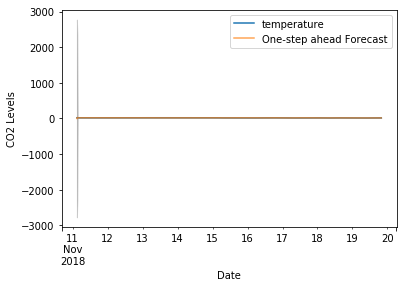

In [8]:
ax = data['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.Figure(figsize=(20,8))
plt.show()